In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from numpy import mean, std
from sklearn.manifold import MDS

# Load into Python
cars_od = pd.read_csv("cars.dissimilarity.csv", sep=",", index_col=0)
cars_ar = pd.read_csv("cars.ar.csv", sep=",", index_col=0)

## Part A: Metric multidimensional scaling

(1) Plot the GOF or BOF measure for every value of k from 1 to 9. What would you pick as the the most appropriate value? The guiding principle to pick the best k is to identify the value of k beyond which there is very limited improvement of GOF or BOF. Turnin: the plot, and your chosen value of "k" .


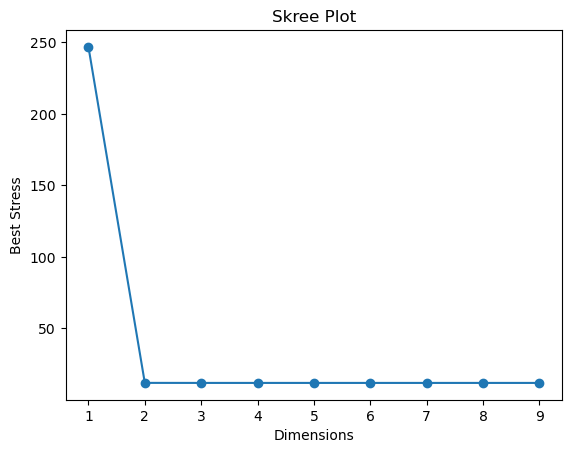

In [279]:
# Calculate stress for k = 1-9
stress = []
for k in range(1, 10):
    mds = MDS(n_components = k, metric=True, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
    mds_fit_out = mds.fit(cars_od)
    stress = np.append(stress, mds_fit_out.stress_)
    # mds_fit_out.embedding_

# Plot stress
plt.plot(range(1, 10), stress, marker='o')
plt.xlabel('Dimensions')
plt.ylabel('Best Stress')
plt.title('Skree Plot')
plt.show()

(2) Regardless of what you found in (1) above, for this next part take the number of dimensions to be k=2. Plot the products at their coordinates as output by MDS. Next to each point on the plot, place a text label giving the name of the corresponding product like the in plots we saw in the lecture slides.  In R this is done by the text() command after creating the display of the plot, and in Python matplotlib.pyplot by using the annotate() command before  creating the display of the plot by show()

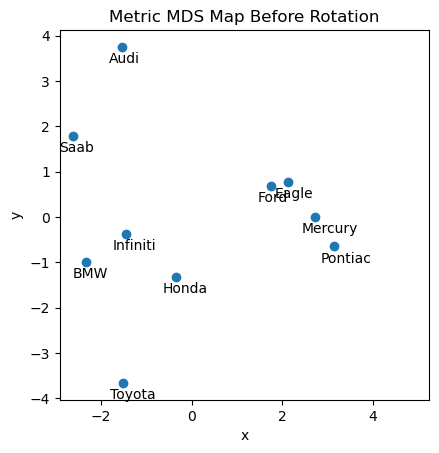

In [280]:
mds = MDS(n_components = 2, metric=True, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
mds_fit_out = mds.fit(cars_od)

# Plot MDS
plt.scatter(mds_fit_out.embedding_[:,0], mds_fit_out.embedding_[:,1])
plt.title('Metric MDS Map Before Rotation')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
for i, car in enumerate(cars_od.columns):
    plt.annotate(car, (mds_fit_out.embedding_[i,0]-0.299, mds_fit_out.embedding_[i,1]-0.35))
plt.show()

## Part B: Nonmetric multidimensional scaling

(1) Plot the stress measure for every value of k from 1 to 5. What would you pick as the the most appropriate value? The guiding principle to pick the best k is to identify the value of k beyond which there is very limited improvement of GOF or BOF. Turnin: the plot, and your chosen value of "k".

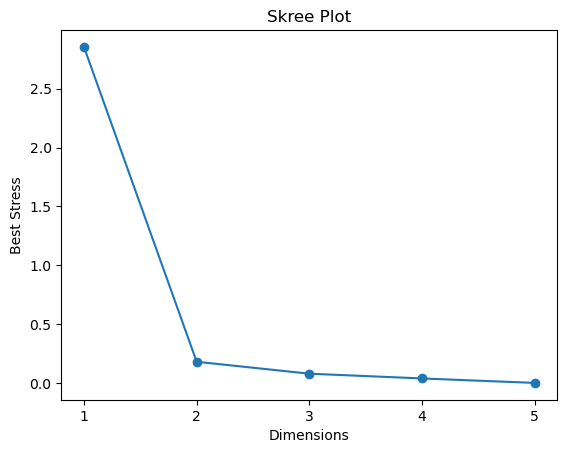

In [281]:
# Calculate stress for k = 1-9
stress = []
for k in range(1, 6):
    mds = MDS(n_components = k, metric=False, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
    mds_fit_out = mds.fit(cars_od)
    stress = np.append(stress, mds_fit_out.stress_)
    # mds_fit_out.embedding_

# Plot stress
plt.plot(range(1, 6), stress, marker='o')
plt.xlabel('Dimensions')
plt.ylabel('Best Stress')
plt.title('Skree Plot')
plt.xticks(range(1, 6))
plt.show()

(2) Regardless of what you found in (1) above, for this next part take the number of dimensions to be k=2. Produce an equally scaled plot of the points with labels corresponding to the product names.

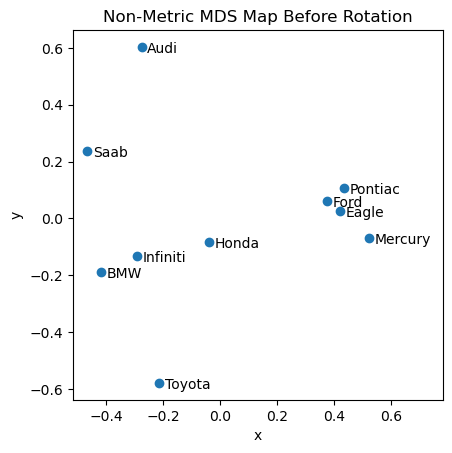

In [282]:
mds = MDS(n_components = 2, metric=False, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
mds_fit_out = mds.fit(cars_od)

# Plot MDS
plt.scatter(mds_fit_out.embedding_[:,0], mds_fit_out.embedding_[:,1])
plt.title('Non-Metric MDS Map Before Rotation')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
for i, car in enumerate(cars_od.columns):
    plt.annotate(car, (mds_fit_out.embedding_[i,0]+0.02, mds_fit_out.embedding_[i,1]-0.02))
plt.show()

## Part C: Factor Analysis

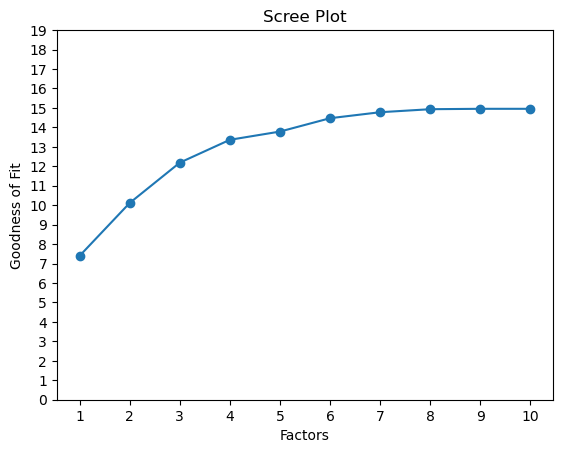

In [283]:
from factor_analyzer import FactorAnalyzer

gof = []
for f in range(1, 11):
    fa = FactorAnalyzer(n_factors=f, rotation=None)
    fa_fit_out = fa.fit(cars_ar)
    fa_communalities = fa_fit_out.get_communalities()
    fa_gof = sum(fa_communalities)
    gof = np.append(gof, fa_gof)
    # fa_scores = fa_fit_out.transform(cars_ar)
    # fa_factor_loadings = fa_fit_out.loadings_

# Plot GOF
plt.plot(range(1, 11), gof, marker='o')
# Set x and y ticks
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 20, 1))
plt.xlabel('Factors')
plt.ylabel('Goodness of Fit')
plt.title('Scree Plot')
plt.show()

In [284]:
fa = FactorAnalyzer(n_factors=2, rotation=None)
fa_fit_out = fa.fit(cars_ar)
fa_communalities = fa_fit_out.get_communalities()
fa_gof = sum(fa_communalities)
fa_scores = fa_fit_out.transform(cars_ar)
fa_factor_loadings = fa_fit_out.loadings_

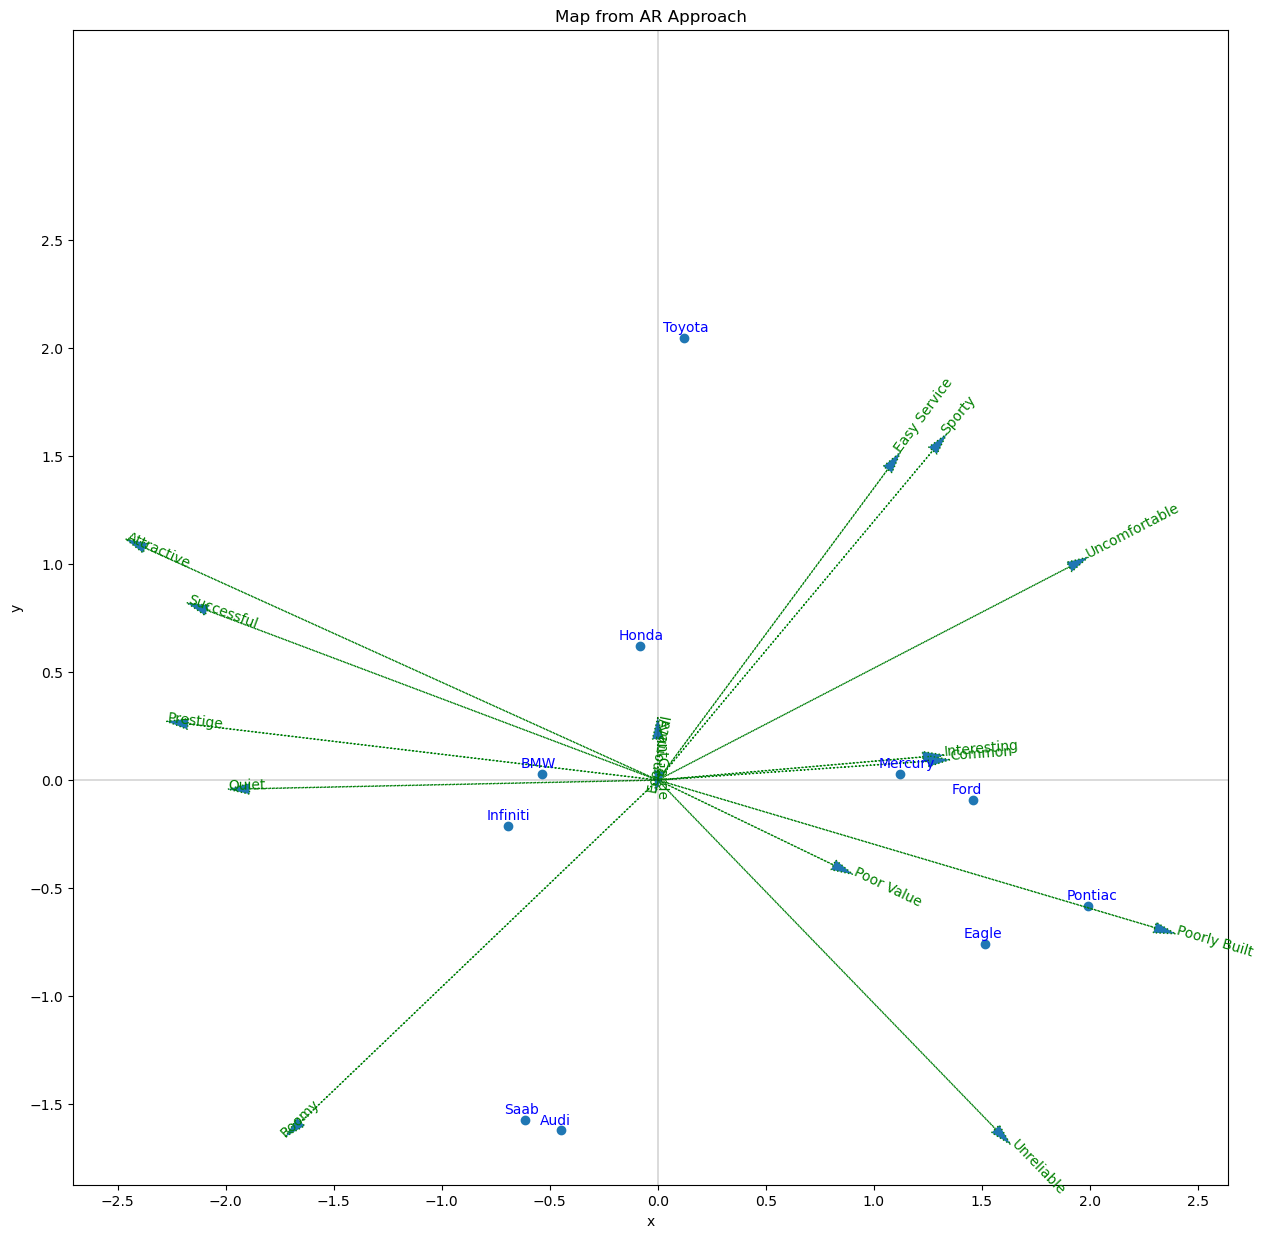

In [285]:
plt.figure(figsize=(15, 15))
plt.scatter(fa_scores[:,0], fa_scores[:,1])

# Plotting cars
for i, car in enumerate(cars_ar.index):
    plt.annotate(car, (fa_scores[i,0]-0.099, fa_scores[i,1]+0.03), color = 'blue')

# Plotting attributes
for i, factor in enumerate(cars_ar.columns):
    # if factor in ['Poorly Built', 'Attractive', 'Uncomfortable', 'Roomy', 'Sporty']:    
        betax = fa_factor_loadings[i, 0]
        betay = fa_factor_loadings[i, 1]
        arrowlengthscaleup = 2.65
        R2value = fa_communalities[i]
        arrowlabel = factor
        arrow_origin_x = 0
        arrow_origin_y = 0
        arrow_end_x = arrowlengthscaleup*R2value*betax/np.sqrt(betax**2+betay**2)
        arrow_end_y = arrowlengthscaleup*R2value*betay/np.sqrt(betax**2+betay**2)
        plt.arrow(arrow_origin_x, 
                arrow_origin_y, 
                arrow_end_x-arrow_origin_x, 
                arrow_end_y-arrow_origin_y, 
                length_includes_head=True, 
                head_width=0.05, 
                head_length=0.1,
                ec='green',
                linestyle='dotted',
                
                linewidth=1)
        plt.text(arrow_end_x, arrow_end_y, arrowlabel, color='green',
            rotation=np.rad2deg(np.arctan(arrow_end_y/arrow_end_x)), rotation_mode='anchor')
    
# Beautification
plt.xticks(np.arange(-2.5, 3, 0.5))
plt.yticks(np.arange(-2.5, 3, 0.5))
plt.axvline(x=0, color='black', linewidth=0.2) # X = 0 axis
plt.axhline(y=0, color='black', linewidth=0.2) # Y = 0 axis
#Plot a line with equation y = x
plt.title('Map from AR Approach')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.show()

## Part D: Competition Analysis using text mining of Amazon reviews [Optional for Extra Credit]

In [286]:
reviews = pd.read_csv("reviews.csv")
products = pd.read_csv("asins.csv")
bow = pd.read_csv("bag-of-words-representation.csv", index_col=0)

In [287]:
reviews

,asin,yr,month,rating,yeshelpfulnessvotes,totalhelpfulnessvotes,wordcount,summaryreview,fullreview
0,B000KK53L6,2008,4,5.0,3,3,242,excellent product,i am 44 years old and have suffered with sever...
1,B000KK53L6,2008,1,5.0,3,3,113,"Be patient, it really works.",I used this product after using Proactiv for a...
2,B000KK53L6,2007,3,5.0,3,3,184,This product really works.,I have tried it all and this is the only produ...
3,B000KK53L6,2011,11,5.0,5,6,1145,Fast resuts!!!!,"I'm now 22 years old, and I've been struggling..."
4,B000KK53L6,2012,2,5.0,2,2,223,Sooooo happy! Use sparingly.,"I have been having problems with acne, mostly ..."
...,...,...,...,...,...,...,...,...,...
5299,B000EGMHKQ,2009,1,5.0,1,2,17,I love this product!!,"HI,\tThis is a wonderful product. It is very ..."
5300,B000EGMHKQ,2012,11,5.0,0,1,20,Something for my sister,dont really know how it works but got it for m...
5301,B000EGMHKQ,2011,2,2.0,0,2,119,Why buy this...when you can use straight up Ol...,Unless you have the dryest of all dryest skin ...
5302,B000EGMHKQ,2011,7,2.0,0,3,74,Quite Disappointed,"The product claims ""Magnificent anti-aging Eli..."


In [288]:
bow

,acid,acne,actually,ago,almost,also,always,amazing,amazon,another,...,well,will,without,work,worked,works,worth,wrinkles,year,years
1,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,28,0,0,3,0,1,4,2,2,...,0,7,1,2,0,4,0,0,0,2
5,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5303,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [289]:
products

,asin,nreviews,p1star,p2star,p3star,p4star,p5star,title
0,B000PLUZL8,407,5,17,63,5,7,"Salicylic Acid 20% Gel Peel, 30ml (Professional)"
1,B000F63TW0,301,2,17,69,4,5,Olay Regenerist Microdermabrasion 2.2 Oz & Pee...
2,B00008CMOS,264,3,18,66,8,3,Queen Helene Facial Masques (Masks)
3,B0007W1R58,234,8,19,58,6,6,Olay Regenerist Night Recovery Moisturizing Tr...
4,B00027DMI8,227,7,15,49,10,17,RoC Retinol Correxion Deep Wrinkle Night Cream...
5,B000EPA4FW,223,8,22,51,7,9,Neutrogena Complete Acne Therapy System
6,B00027DMSI,203,5,22,52,5,13,"Frownies Forehead & Between Eyes, 144 Patches"
7,B000KK53L6,200,7,20,56,4,12,AcneFree Severe Acne Treatment System
8,B0006M5566,197,5,10,73,4,7,eb5 Facial Cream
9,B0009RFB76,161,8,17,45,13,15,"RoC Retinol Correxion Eye Cream, 0.5 Ounce"


In [290]:
bow.columns[99:]

Index(['new', 'next.', 'nice', 'night', 'nothing', 'noticed', 'now', 'oil',
       'oily', 'olay', 'old', 'one', 'peel', 'people', 'pimples', 'pores',
       'pretty', 'price', 'problem', 'product', 'products', 'put', 'really',
       'recommend', 'red', 'results', 'reviews', 'right', 'say', 'scars',
       'see', 'seems', 'sensitive', 'since', 'skin', 'small', 'smell',
       'smooth', 'soft', 'something', 'spots', 'started', 'still', 'stuff',
       'sure', 'take', 'thing', 'think', 'though', 'thought', 'time', 'times',
       'treatment', 'tried', 'try', 'twice', 'two', 'use', 'used', 'using',
       'want', 'wash', 'way', 'week', 'weeks', 'well', 'will', 'without',
       'work', 'worked', 'works', 'worth', 'wrinkles', 'year', 'years'],
      dtype='object')

In [291]:
bow = pd.read_csv("bag-of-words-representation.csv", index_col=0)

similar_words = [
    ['amazing', 'great', 'nice', 'best'],
    # ['bad', 'worse'],
    ['better', 'improvement'],
    # ['can', 'able'],
    ['clean', 'clear'],
    # ['expensive', 'costly'],
    ['facial', 'face'],
    ['fine', 'good', 'well'],
    # ['happy', 'pleased'],
    # ['help', 'assist'],
    # ['however', 'but'],
    # ['just', 'only'],
    ['lot', 'many'],
    # ['love', 'adore'],
    # ['make', 'create'],
    ['money', 'price'],
    # ['night', 'evening'],
    # ['recommend', 'suggest'],
    # ['seems', 'appears'],
    ['soft', 'smooth'],
    # ['started', 'began'],
    # ['sure', 'certain'],
    # ['treatment', 'therapy'],
    # ['try', 'attempt'],
    # ['want', 'desire'],
    ['work', 'worked', 'works'],
    ['time', 'times'],
    ['month', 'months'],
    ['year', 'years'],
    ['feel', 'feeling', 'feels', 'felt'],
    ['day', 'days'],
    ['doesnt', 'dont', 'didnt'],
    ['oil', 'oily'],
    ['product', 'products'],
    ['think', 'thought'],
    ['use', 'using', 'used'],
    ['find', 'found'],
    ['get', 'getting', 'got'],
    ['twice', 'two'],
    ['try', 'tried'],
    ['week', 'weeks'],
    ['going', 'gone'],
    ['less', 'little', 'small'],
    ['look', 'looks', 'looking'],
    ['want', 'need'],
    ['moisturizer', 'lotion'],
    ['made', 'make', 'makes'],
]

for i in similar_words:
    bow[i[0]] = bow[i].sum(axis=1)
    bow = bow.drop(columns=i[1:])

In [292]:
for i in bow.columns:
    print(i)

acid
acne
actually
ago
almost
also
always
amazing
amazon
another
anything
apply
around
away
back
bad
better
bit
bought
break.
breakouts
buy
can
cant
clean
couple
cream
day
decided
definitely
difference
doesnt
dry
enough
even
ever
every
expensive
eyes
facial
far
feel
find
fine
first
get
give
going
happy
help
highly
however
ive
just
keep
know
last
left
less
like
lines
long
look
lot
love
made
may
minutes
moisturizer
money
month
morning
much
never
new
next.
night
nothing
noticed
now
oil
olay
old
one
peel
people
pimples
pores
pretty
problem
product
put
really
recommend
red
results
reviews
right
say
scars
see
seems
sensitive
since
skin
smell
soft
something
spots
started
still
stuff
sure
take
thing
think
though
time
treatment
try
twice
use
want
wash
way
week
will
without
work
worth
wrinkles
year


In [293]:
bow.columns[:100]

Index(['acid', 'acne', 'actually', 'ago', 'almost', 'also', 'always',
       'amazing', 'amazon', 'another', 'anything', 'apply', 'around', 'away',
       'back', 'bad', 'better', 'bit', 'bought', 'break.', 'breakouts', 'buy',
       'can', 'cant', 'clean', 'couple', 'cream', 'day', 'decided',
       'definitely', 'difference', 'doesnt', 'dry', 'enough', 'even', 'ever',
       'every', 'expensive', 'eyes', 'facial', 'far', 'feel', 'find', 'fine',
       'first', 'get', 'give', 'going', 'happy', 'help', 'highly', 'however',
       'ive', 'just', 'keep', 'know', 'last', 'left', 'less', 'like', 'lines',
       'long', 'look', 'lot', 'love', 'made', 'may', 'minutes', 'moisturizer',
       'money', 'month', 'morning', 'much', 'never', 'new', 'next.', 'night',
       'nothing', 'noticed', 'now', 'oil', 'olay', 'old', 'one', 'peel',
       'people', 'pimples', 'pores', 'pretty', 'problem', 'product', 'put',
       'really', 'recommend', 'red', 'results', 'reviews', 'right', 'say',
       'sca

In [294]:
bow.columns[99:]

Index(['scars', 'see', 'seems', 'sensitive', 'since', 'skin', 'smell', 'soft',
       'something', 'spots', 'started', 'still', 'stuff', 'sure', 'take',
       'thing', 'think', 'though', 'time', 'treatment', 'try', 'twice', 'use',
       'want', 'wash', 'way', 'week', 'will', 'without', 'work', 'worth',
       'wrinkles', 'year'],
      dtype='object')

In [295]:
len(bow.columns)

132